#                                                         OLA DRIVER ATTRITION ANALYSIS:

##                                                              PROBLEM STATEMENT:

#### Ola struggles with a high churn rate among its drivers and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates, which leads to: 

-Increased hiring cost. 

-Lower operational efficency. 

-Disrupted customer service quality.

## PROJECT OBJECTIVE:

#### Use information for a segment of drivers for 2019 and 2020 to:

-Identify attrition pattern.

-Predict whether a driver is likely to leave.

-Provide actionable retention strategies.                                       

## DATA EXPLORATION:

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

In [33]:
import io
import pandas as pd
df = pd.read_csv(r"C:\Users\Swati Negi\Downloads\ola_driver.csv")
df


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


### INSPECTION OF THE DATA

In [34]:
df.shape

(19104, 14)

In [35]:
df.dtypes

Unnamed: 0                int64
MMM-YY                   object
Driver_ID                 int64
Age                     float64
Gender                  float64
City                     object
Education_Level           int64
Income                    int64
Dateofjoining            object
LastWorkingDate          object
Joining Designation       int64
Grade                     int64
Total Business Value      int64
Quarterly Rating          int64
dtype: object

### CHECK FOR MISSING VALUES

In [36]:
df.isnull().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

##### There are large number of missing values in "lastworkingdate" column but their is no problem regarding it because it states that number of drivers are still active.

### STATISTICAL SUMMARY:

In [37]:
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


### NUMBER OF UNIQUE DRIVERS

In [38]:
df['Driver_ID'].nunique()

2381

### TEMPORAL ANALYSIS

In [59]:
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'], errors='coerce')
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'], errors='coerce')

#### Number of drivers joined and left each month

In [40]:
df['JoinMonth'] = df['Dateofjoining'].dt.to_period('M')
df['LeaveMonth'] = df['LastWorkingDate'].dt.to_period('M')

join_counts = df['JoinMonth'].value_counts().sort_index()
print(join_counts)

leave_counts = df['LeaveMonth'].value_counts().sort_index()
print(leave_counts)

JoinMonth
2013-04     31
2013-05     24
2013-06     59
2013-07     63
2013-08     33
          ... 
2020-08    325
2020-09    314
2020-10    139
2020-11     93
2020-12     59
Freq: M, Name: count, Length: 85, dtype: int64
LeaveMonth
2018-12      5
2019-01     82
2019-02     85
2019-03     75
2019-04     49
2019-05     98
2019-06     61
2019-07     48
2019-08     53
2019-09     79
2019-10     70
2019-11     69
2019-12     56
2020-01     70
2020-02     70
2020-03     58
2020-04     42
2020-05     63
2020-06     77
2020-07    141
2020-08      4
2020-09     66
2020-10     62
2020-11     73
2020-12     60
Freq: M, Name: count, dtype: int64


#### Average tenure of drivers

In [41]:
df['LastDate'] = df['LastWorkingDate'].fillna(df['MMM-YY'])
df['Tenure_Days'] = (df['LastDate'] - df['Dateofjoining']).dt.days
df['Tenure_Days'].mean() / 30  

19.73729934394193

## DATA PREPROCESSING

### FEATURE ENGINEERING:

#### Target variable to indicate whether a driver has left the company based on LastWorkingDate?

In [42]:
df['Attrition'] = df['LastWorkingDate'].notna().astype(int)
print(df['Attrition'])

0        0
1        0
2        1
3        0
4        0
        ..
19099    0
19100    0
19101    0
19102    0
19103    0
Name: Attrition, Length: 19104, dtype: int32


##### If it shows 1 then it means driver has left the ola or if it shows 0 then driver is still active.

#### Tenure or duration of employment

In [43]:
df['Tenure_Days'] = (df['LastDate']-df['Dateofjoining'])
print(df['Tenure_Days'])

0         8 days
1        39 days
2        77 days
3        -5 days
4        25 days
          ...   
19099    54 days
19100    85 days
19101   115 days
19102   146 days
19103   176 days
Name: Tenure_Days, Length: 19104, dtype: timedelta64[ns]


#### Changes of drivers rating and income

In [44]:
df.sort_values(by=['Driver_ID','MMM-YY'],inplace = True)

df['Prev_Rating'] = df.groupby('Driver_ID')['Quarterly Rating'].shift(1)
df['Rating_Increased'] = (df['Quarterly Rating']> df['Prev_Rating'])
print(df['Rating_Increased'])

0        False
1        False
2        False
3        False
4        False
         ...  
19099    False
19100    False
19101    False
19102    False
19103    False
Name: Rating_Increased, Length: 19104, dtype: bool


In [45]:
df['Prev_Income'] = df.groupby('Driver_ID')['Income'].shift(1)
df['Income_Increased'] = (df['Income']>df['Prev_Income'])
print(df['Income_Increased'])

0        False
1        False
2        False
3        False
4        False
         ...  
19099    False
19100    False
19101    False
19102    False
19103    False
Name: Income_Increased, Length: 19104, dtype: bool


### EDA (EXPLORATORY DATA ANALYSIS)

####  Distributions of Age, Income, and Total Business Value

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

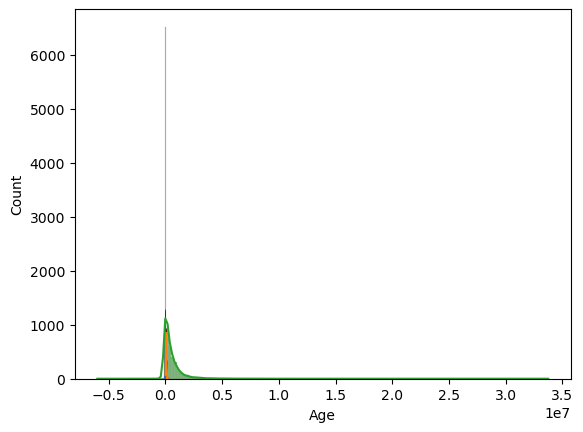

In [46]:
sns.histplot(df['Age'],kde=True)
sns.histplot(df['Income'],kde=True)
sns.histplot(df['Total Business Value'],kde=True)

#### Quarterly Rating vary across different drivers and time periods

<Axes: xlabel='Quarterly Rating', ylabel='Income'>

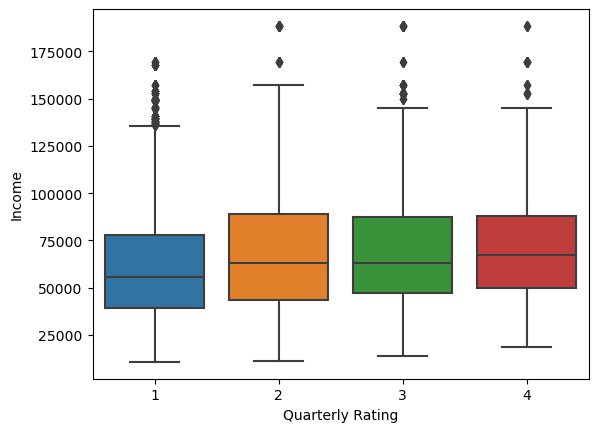

In [47]:
sns.boxplot(x='Quarterly Rating', y= 'Income', data = df)

#### Trends or patterns in the monthly income or business value acquired

<Axes: xlabel='MMM-YY'>

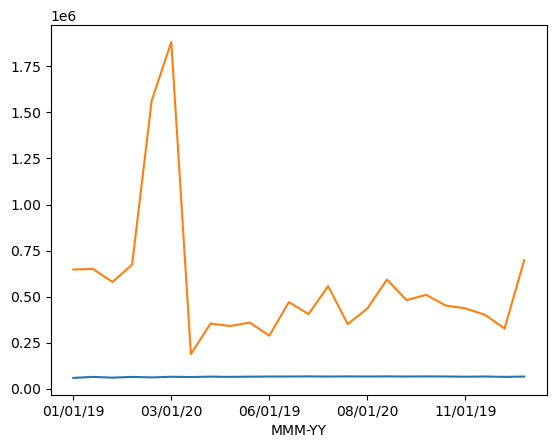

In [48]:
df.groupby('MMM-YY')['Income'].mean().plot()
df.groupby('MMM-YY')['Total Business Value'].mean().plot()

### Missing Values Handling:

##### In 'LastWorkingDate' their are many missing values but it is used to define the attrrition part for the projects, so we don't need to handle this type of missing values.

##### Other missing values like "Age" and "Gender" can be imputed using:

In [54]:
df['Age'].fillna(df['Age'].median(),inplace = True)

In [55]:
df['Gender'].fillna(df['Gender'].median(),inplace = True)

### Correlation and Relationships

####  Correlation between Age and Income

In [56]:
df[['Age','Income']].corr()

,Age,Income
Age,1.000000,0.190995
Income,0.190995,1.000000


##### Weak correlation between Age and Income

### How do Education_Level and City affect Total Business Value

In [57]:
df.groupby('Education_Level')['Total Business Value'].mean()
df.groupby('City')['Total Business Value'].mean()

City
C1     531560.280650
C10    540753.736559
C11    538549.145299
C12    667282.310867
C13    796263.075571
C14    607931.635802
C15    553266.636005
C16    632585.712271
C17    429160.204545
C18    550106.250000
C19    630978.151986
C2     553365.084746
C20    468535.605159
C21    572684.776119
C22    559749.431397
C23    423986.561338
C24    584712.426710
C25    507575.119863
C26    661837.445339
C27    572039.312977
C28    591406.778917
C29    736637.511111
C3     458003.940345
C4     556092.266436
C5     634855.975610
C6     566042.954545
C7     484569.228243
C8     566328.539326
C9     467914.865385
Name: Total Business Value, dtype: float64

### Are drivers with higher Quarterly Rating more likely to stay longer

<Axes: xlabel='Attrition', ylabel='Quarterly Rating'>

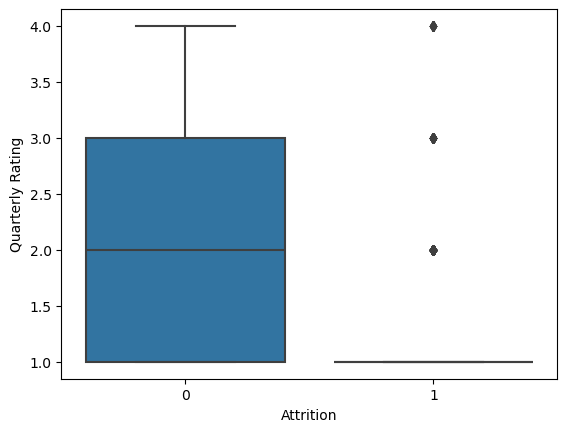

In [58]:
sns.boxplot(x='Attrition', y='Quarterly Rating', data = df)

##### Higher ratings is equal to higher retention

## Actionable Insights & Recommendations

### Based on the analysis, strategies Ola can implement to improve driver retention:

-Onboard support: At starting ola should provide training and bonus during the first 3 or 6 months of the joining.

-Mentor low rated driver: To reduce the churn ola can use the early support strategy.

-Incentive providation: Incentive can be given after every milestone achieved and recognition.


### There are specific demographic groups or performance metrics that require targeted interventions:

-Drivers with education level 0 should be provide a support material digitally.

-Drivers who have quarterly rating<2 should be given personalized coaching or training.

-Drivers who have decreasing income trend should be offered a minimum guaranteed income.



###  Key factors influencing driver attrition:

-Stagnant income.

-Poor Quarterly Rating.

-Low Tenure.

# THANK YOU 